In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [275]:
data = np.loadtxt('logistic_regression_data/ex2data1.txt', delimiter=',')


#### PLOT DATA

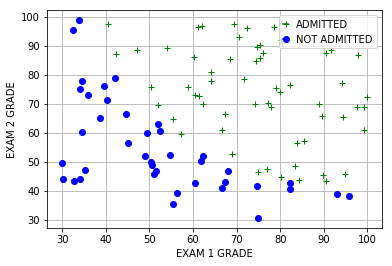

In [276]:
X = data[:,:2]
y = data[:,2]

pos = np.where(y == 1)
neg = np.where(y == 0)

p1 = plt.plot(X[pos, 0], X[pos, 1], marker = '+', markersize = 6, color = 'g')[0]
p2 = plt.plot(X[neg, 0], X[neg, 1], marker = 'o', markersize = 6, color = 'b')[0]

plt.xlabel('EXAM 1 GRADE')
plt.ylabel('EXAM 2 GRADE')
plt.legend((p1, p2), ('ADMITTED', 'NOT ADMITTED'), numpoints=1, handlelength=0.5, loc=1)
plt.grid(True)
plt.show() 


#### SIGMOID FUNCTION

In [277]:
# Logistic/Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

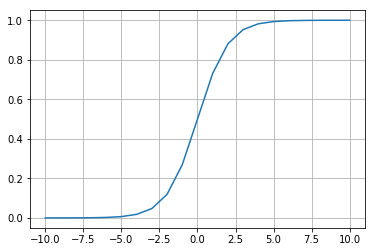

In [278]:
# Sigmoid Function Curve
nums = np.arange(-10, 11, step=1)
plt.plot(nums, sigmoid(nums))
plt.grid(True)
plt.show()

#### COST FUNCTION

In [279]:
def cost(theta, X, y):
    m = len(y)
    J = 0
    hypothesis = sigmoid(np.dot(X, theta))
    cost = 1/float(m) * (np.dot(- y, np.log(hypothesis)) - np.dot((1 - y), (np.log(1 - hypothesis))))
    return cost

#### GRADIENT DESCENT FUNCTION

In [280]:
def gradient_descent(theta, X, y):
    m = len(y)
    grad = np.zeros_like(theta)
    grad = 1 / float(m) * np.dot((sigmoid(np.dot(X, theta)) - y), X)
    return grad

#### TESTING COST AND GRADIENT DESCENT

In [281]:
training_samples = data.shape[0]
cols = data.shape[1]
y = data[:, (cols - 1)]
X = np.column_stack((np.ones((training_samples, 1)), data[:, : (cols - 1)]))
theta = np.zeros([cols, 1])

# Cost
print 'Testing Cost():'
J = cost(theta, X, y)
print 'With theta = [0 ; 0; 0], Cost computed = ', round(J, 4)
print 'Expected cost value (approx) = 0.693\n'

# Gradient Descent
print 'Testing gradient_descent():'
grad = gradient_descent(theta, X, y)
print 'With theta = [0 ; 0; 0], Gradient descent computed = ', grad[0]
print 'Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n'

Testing Cost():
With theta = [0 ; 0; 0], Cost computed =  0.6931
Expected cost value (approx) = 0.693

Testing gradient_descent():
With theta = [0 ; 0; 0], Gradient descent computed =  [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



#### LEARNING PARAMETERS USING SCIPY

In [283]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient_descent, args=(X, y))
optimal_theta = result[0]
print "Optimized theta: ", optimal_theta


Optimized theta:  [-25.16131866   0.20623159   0.20147149]


#### FUNCTION TO CALCULATE ACCURACY

In [284]:
def predict(theta, exam1, exam2):
    return sigmoid(theta[0] + exam1 * theta[1] + exam2 * theta[2])

def find_accuracy(theta, exam1, exam2, y, training_samples):
    rounded_predictions = np.round(predict(theta, exam1, exam2))
    sum = np.sum(rounded_predictions == y)
    accuracy = sum / float(training_samples)
    return accuracy

#### EVALUATE LOGISTIC REGRESSION

In [257]:
p = predict(optimal_theta, 45, 85)
print 'For a student with scores 45 and 85, we predict an admission probability of', p

For a student with scores 45 and 85, we predict an admission probability of 0.776290623948


In [258]:
exam1 = data[:, 0]
exam2 = data[:, 1]
train_accuracy = find_accuracy(optimal_theta, exam1, exam2, y, training_samples)
print "Train Accuracy: ", train_accuracy
print 'Expected accuracy (approx): 89.0\n'

Train Accuracy:  0.89
Expected accuracy (approx): 89.0



#### PLOT DECISION BOUNDARY

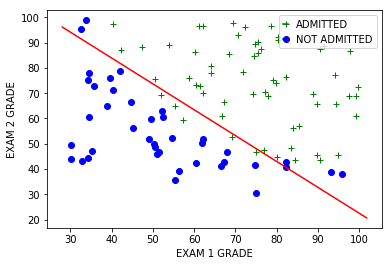

In [268]:
X = data[:,:2]
y = data[:,2]

pos = np.where(y == 1)
neg = np.where(y == 0)

p1 = plt.plot(X[pos, 0], X[pos, 1], marker = '+', markersize = 6, color = 'g')[0]
p2 = plt.plot(X[neg, 0], X[neg, 1], marker = 'o', markersize = 6, color = 'b')[0]

plt.xlabel('EXAM 1 GRADE')
plt.ylabel('EXAM 2 GRADE')
plt.legend((p1, p2), ('ADMITTED', 'NOT ADMITTED'), numpoints=1, handlelength=0.5, loc=1)

X = np.column_stack((np.ones((training_samples, 1)), data[:, : (cols - 1)]))
plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./optimal_theta[2])*(optimal_theta[1]*plot_x + optimal_theta[0])

p3 = plt.plot(plot_x, plot_y, color = 'r')
        
plt.show(block=False)